In [1]:
import numpy as np
import matplotlib.pyplot as pl

Code adapted from [https://allofyourbases.com/2017/08/21/gaussian-processes-in-python/](https://allofyourbases.com/2017/08/21/gaussian-processes-in-python/)

See also the linked paper [https://www.robots.ox.ac.uk/~sjrob/Pubs/philTransA_2012.pdf](https://www.robots.ox.ac.uk/~sjrob/Pubs/philTransA_2012.pdf)

In [2]:
def cov_kernel(x1,x2,h,lam):
 
    """
    Squared-Exponential covariance kernel
    """
 
    k12 = h**2*np.exp(-1.*(x1 - x2)**2/lam**2)
    return k12

- On the diagonal K = h^2
- Lambda functions like a std. dev.

In [3]:
def make_K(x, h, lam):
 
    """
    Make covariance matrix from covariance kernel
    """
 
    # for a data array of length x, make a covariance matrix x*x:
    K = np.zeros((len(x),len(x)))
 
    for i in range(0,len(x)):
        for j in range(0,len(x)):
 
            # calculate value of K for each separation:
            K[i,j] = cov_kernel(x[i],x[j],h,lam)
    
    return K

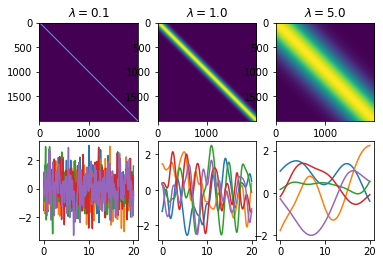

In [4]:
# make an array of 200 evenly spaced positions between 0 and 20:
x = np.arange(0, 20.,0.01)
 
for i in range(0,3):
 
    h = 1.0
 
    if (i==0): lam = 0.1
    if (i==1): lam = 1.0
    if (i==2): lam = 5.0
 
    # make a covariance matrix:
    K = make_K(x,h,lam)
 
    # five realisations:
    for j in range(0,5):
 
        # draw samples from a co-variate Gaussian distribution, N(0,K):
        y = np.random.multivariate_normal(np.zeros(len(x)),K)
 
        tmp2 = '23'+str(i+3+1)
        pl.subplot(int(tmp2))
        pl.plot(x,y)
 
    tmp1 = '23'+str(i+1)
    pl.subplot(int(tmp1))
    pl.imshow(K)
    pl.title(r"$\lambda = $"+str(lam))

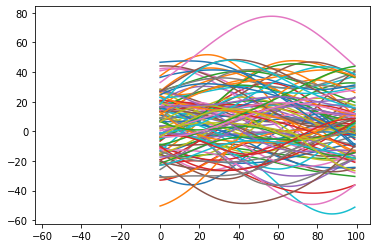

In [113]:
# make an array of 200 evenly spaced positions between 0 and 20:
x = np.arange(0, 100, 1)
  
h = 20
# L = np.arange(50,60,.125)
L = [55]
p_L = []

n=100
for l in L:
    # make a covariance matrix:
    K = make_K(x,h,l)
    
    samples = np.array([])
    # five realisations:
    for j in range(0,n):

        # draw samples from a co-variate Gaussian distribution, N(0,K):
        y = np.random.multivariate_normal(6*np.ones(len(x)),K)
        pl.plot(x,y)
        samples = np.append(samples, y)

    d, b, p = pl.hist(samples, density=True, bins=50)
    p_L.append(np.log(d[b[1:] > 31].sum()))

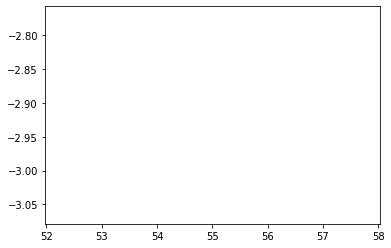

In [114]:
pl.plot(L, p_L)

In [115]:
L[np.array(p_L).argmax()]

55

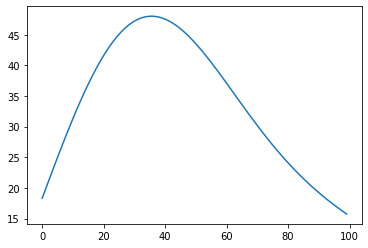

In [116]:
pl.plot(x,y)